In [ ]:
import tensorflow
from tensorflow.keras import layers , models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tensorflow.keras.datasets.mnist.load_data()

train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
train_images = train_images.reshape((-1, 28, 28, 1))
train_images = train_images.astype('float32') / 255.0
test_images = test_images.reshape((-1, 28, 28, 1))
test_images = test_images.astype('float32') / 255.0

In [ ]:
classes = ['0','1','2','3','4','5','6','7','8','9']

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
)
datagen.fit(train_images)

In [ ]:
models = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',padding='same', input_shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu',padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu',padding='same'),
    layers.Conv2D(32, (3, 3), activation='relu',padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), activation='relu',padding='same'),
    layers.Conv2D(32, (3, 3), activation='relu',padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers. Dropout(0.25),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
models.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
history = models.fit(datagen.flow(train_images, train_labels, batch_size=64),
                     epochs=10,
                     validation_data=(test_images, test_labels),
                     verbose=1
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


938/938 ━━━━━━━━━━━━━━━━━━━━ 268s 283ms/step - accuracy: 0.7262 - loss: 0.8031 - val_accuracy: 0.9839 - val_loss: 0.0491
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 331s 293ms/step - accuracy: 0.9630 - loss: 0.1184 - val_accuracy: 0.9892 - val_loss: 0.0362
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 275s 293ms/step - accuracy: 0.9740 - loss: 0.0896 - val_accuracy: 0.9919 - val_loss: 0.0294
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 264s 282ms/step - accuracy: 0.9771 - loss: 0.0760 - val_accuracy: 0.9922 - val_loss: 0.0250
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 331s 292ms/step - accuracy: 0.9815 - loss: 0.0668 - val_accuracy: 0.9933 - val_loss: 0.0195
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 273s 291ms/step - accuracy: 0.9834 - loss: 0.0568 - val_accuracy: 0.9946 - val_loss: 0.0203
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 272s 290ms/step - accuracy: 0.9839 - loss: 0.0557 - val_accuracy: 0.9931 - val_loss: 0.0227
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 314s 281ms/step - accuracy: 0.9843 - loss: 0.05

In [ ]:
test_loss, test_acc = models.evaluate(test_images, test_labels, verbose=0)
print(f"Test Accuracy: {test_acc*100:.2f}%")

Test Accuracy: 99.40%


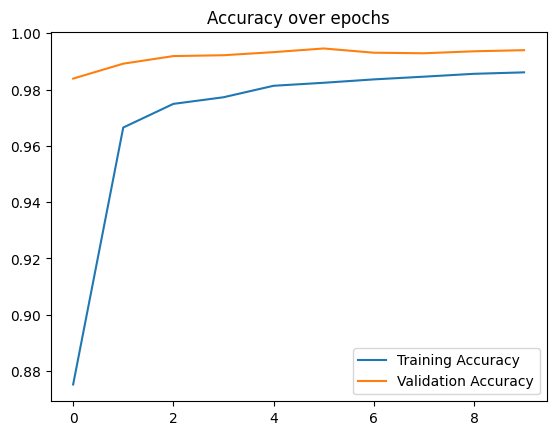

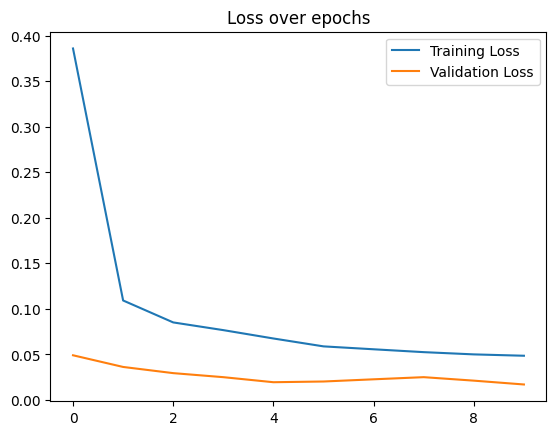

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy over epochs")
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss over epochs")
plt.show()

In [ ]:
pred_probs = models.predict(test_images)
pred_labels = np.argmax(pred_probs, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step


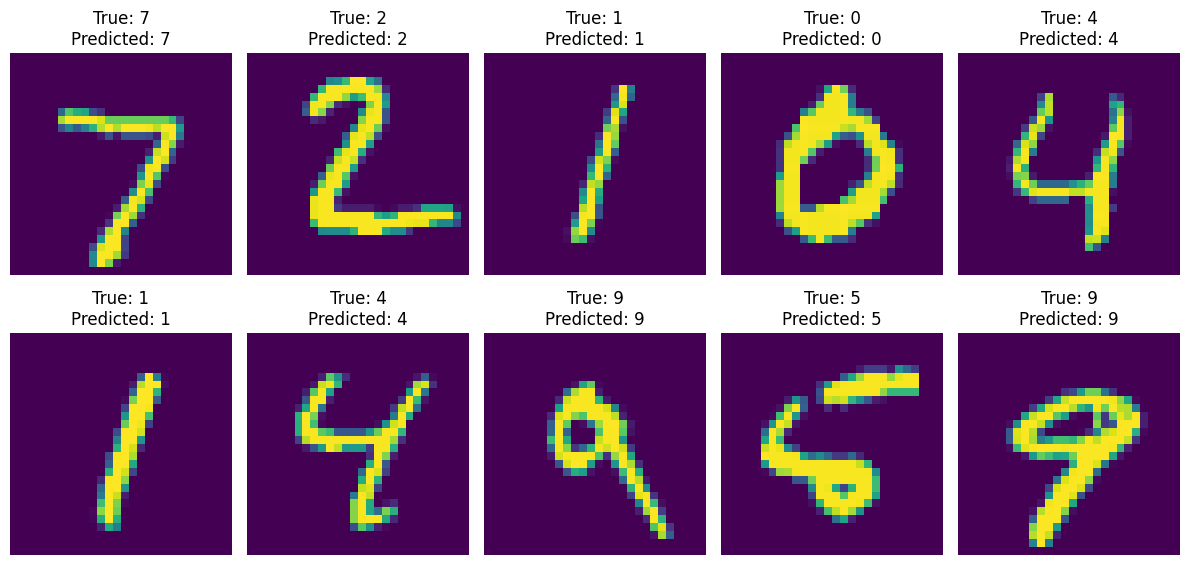

In [ ]:
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(test_images[i])
    plt.axis('off')
    plt.title(f"True: {classes[test_labels[i]]}\nPredicted: {classes[pred_labels[i]]}")
plt.tight_layout()
plt.show()